# <center> Punchlines as Mirrors: Social Attitudes, Politics, and Biases in the *The New Yorker* Caption Contest

Humor reflects society’s views, stereotypes, and political climate. The New Yorker Caption Contest offers a unique lens into this process, showing what people find acceptable, absurd, or taboo.

## <center> Narrative Flow
- **Introduction:** The Caption Contest as a cultural mirror — humor as social data.
- **Axis 1:** What Is Considered Funny
- **Axis 2:** Professions & politics → humor about authority and power
- **Axis 3:** Social norms → gender roles
- **Conclusion:** Humor not only entertains — it reveals evolving attitudes, biases, and the cultural pulse of society.

> **Idea for website:** Each section should begin with a set of cartoons from the contest to immerse the viewer in humor before moving to analysis.

---

## <center> Axes of Research

### <center> 2. Professions, Politics, and Power

- **Professions in Humor:** Which jobs are depicted most often? Which are ridiculed vs. admired? What stereotypes recur (e.g., lawyers as tricksters, doctors as saviors)?
- **Politics in Humor:** Do captions reflect partisan leanings (Democrat vs. Republican) or mock political figures more broadly? Are political jokes rated differently?
- **Interplay:** Professions like politicians or lawyers sit at the crossroads of both — this axis highlights how authority and social roles are viewed through humor.

**Plots / Statistics:**
- Bar / Word Clouds: Frequency of professions mentioned in captions (“doctor,” “lawyer,” “politician”).
- Histograms / Line Plots: Frequency of professions across time.
- Grouped Bar Charts: Average funniness scores by profession category (healthcare, law, politics, education, etc.).
- Heatmaps: Cross-tab professions × sentiment (positive/negative/neutral).
- Cartoon + Caption Samples: A few annotated cartoons showing how professions are ridiculed.

**For Politics:**
- Timeline of mentions of political figures/parties.
- Sentiment distribution around Democrats vs. Republicans.
- Example “political joke clusters” side by side with major events (e.g., elections).

**Statistical Tests & Models:**
- t-tests / z-tests → Compare funniness scores of politicians vs. other professions.
- Multiple hypothesis testing (FDR/BH) → Control for comparisons across 30+ job categories.
- Network graphs → Co-occurrence of profession keywords with stereotypes (“lawyer–money,” “doctor–death”).
- Linear regression / lmplot → Test if political humor ratings rise around elections.
- Pearsonr / Spearmanr → Correlation between real-world political cycles and joke frequency.


In [1]:
import sys
print(sys.executable)

c:\Users\andra\anaconda3\envs\myenv\python.exe


In [2]:
#Loading packages (hopefully installed, all is correct version and whatnot)
import os

# Data manipulation
import numpy as np
import pandas as pd
import pickle

# Statistical analysis
import scipy.stats as stats

# Language processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import spacy
import textblob as TextBlob
import contractions
import string
from collections import Counter
from nltk.corpus import wordnet as wn

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('punkt')       # Tokeniser
nltk.download('stopwords')   # Stopwords list
nltk.download('wordnet')     # Lemmatiser
#nlp = spacy.load('en_core_web_sm')

stop_words = set(stopwords.words('english')) # Initialise stopwords
lemmatizer = WordNetLemmatizer() # Initialise lemmatiser

[nltk_data] Downloading package punkt to C:\Users\andra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\andra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


---
# <center> Preparing the Data

In this section, the code will preprocess the text of the captions and create a tokenized column suitable for analysis. The preprocessing steps include:

- Converting all text to **lower-case**  
- Removing **stopwords**  
- Eliminating **punctuation** such as dots and commas  
- **Expanding contractions**, e.g., “don’t” → “do not”, “it’s” → “it is”  
- **Correcting typos** to standardize common misspellings (optional but recommended for cleaner analysis)  
- **Removing very short tokens** (e.g., single letters or extremely short words)  
- **Lemmatizing words** to reduce them to their base forms, e.g., “running” → “run”, “better” → “good”  

These steps will prepare the captions for downstream analyses, such as frequency counts, word clouds, sentiment analysis, and extraction of professions or topics from the text.

I will only run this cell once, and save the outcome data in a new file, still within my folder here for the time being. For future work, there will be no need to do this work again. Then, I think this data should be added to the datapreparation step, as I am not doing anything fundamentally bad. I am creating new columns in the dataframes, so only the data becomes larger.


The code is in a __text__ file, it is not necessary to see here. the function to tokenise is included below.

In [9]:
def preprocess_text_list(entry, min_len=2):
    """Preprocess a list of text entries or a single string."""
    if isinstance(entry, list):
        text = " ".join(entry)
    elif isinstance(entry, str):
        text = entry
    else:
        return ""

    # Lowercase
    text = text.lower()

    # Expand contractions
    text = contractions.fix(text)

    # Typo correction
    text = str(TextBlob(text).correct())

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and short tokens
    tokens = [word for word in tokens if word not in stop_words and len(word) >= min_len]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

In [10]:
# Load clean data
# Check if the path is correct and the file exists

fullldata = '../../data/cleaned_data_prepared.pkl'
if os.path.exists(fullldata):
    with open(fullldata, "rb") as f:
        cleaned_stored_data = pickle.load(f)
    print("Cleaned data loaded successfully.")
else:
    print("File not found.")
dataA_cleaned = cleaned_stored_data["dataA"]
dataC_cleaned = cleaned_stored_data["dataC"]
dataA_startID = cleaned_stored_data["dataA_startID"]
dataA_endID = cleaned_stored_data["dataA_endID"]
dataC_lastGoodID = cleaned_stored_data["dataC_lastGoodID"]


Cleaned data loaded successfully.


---
# <center> Professions in Humor

In this section, we will focus on how different professions are depicted in *The New Yorker* Caption Contest captions. Humor often reflects societal attitudes toward authority, expertise, and social roles, and professions provide a lens into these perceptions.  

## <center> Key Points
- **Frequency of depiction:** Which jobs appear most often in captions?  
- **Stereotypes:** How are certain professions portrayed — are they admired, ridiculed, or caricatured?  
  - Example stereotypes: lawyers as tricksters, doctors as saviors.  

## <center> Analytical Approach
To study professions in humor, we will:
- Count the number of times each profession is mentioned across all captions.  (DONE)
- Visualize the distribution with **bar charts** or **word clouds**.  (MISSING)
- Examine sentiment associated with professions using **heatmaps**.  (MISSING)
- Compare average “funniness” scores by profession category to see which roles tend to be funnier.  (MISSING)
- Annotate examples of cartoons and captions to illustrate recurring jokes and stereotypes. (MISSING)

> This analysis will help us answer the question: *“What are people laughing about when it comes to professions?”* (MISSING)


We are only dealing with nouns when depicting jobs, so, as a first step, we need to extract all nouns from our captions. This will essentially reduce the size of the dataset and save us some more time. To do this, I will use the nltk package.

In [11]:
dataA_cleaned0 = dataA_cleaned.copy()
dataC_cleaned0 = dataC_cleaned.copy()


In [12]:
dataA_cleaned0[0].loc[0, 'cleaned_caption'] = 'congressman obstruction job'

To extract nouns, I used the following function. I removed the actual code which was used to run it and save it as it takes really long to run and I dont want to accidentally start it.

In [13]:
def extract_nouns(text):
    # Ensure the input is a string, not a list
    if not isinstance(text, str):
        text = " ".join(text)
    doc = nlp(text.lower())
    return [token.text for token in doc if token.pos_ in ("NOUN", "PROPN")]

# do not run - takes too long

In [14]:
import sys
import os

# Go up two levels from the current notebook folder
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
print("Project root:", project_root)

# Add the project root to sys.path so Python can find 'src'
if project_root not in sys.path:
    sys.path.append(project_root)

# Now this should work
from src.utils.paths import STORED_DATAPREPNOUNS_PKL_PATH, STORED_DATAPREPTOKENS_PKL_PATH

print(STORED_DATAPREPNOUNS_PKL_PATH)
print(STORED_DATAPREPTOKENS_PKL_PATH)

STORED_DATAPREPNOUNS_PKL_PATH_corr = '../../' / STORED_DATAPREPNOUNS_PKL_PATH
STORED_DATAPREPTOKENS_PKL_PATH_corr = '../../' / STORED_DATAPREPTOKENS_PKL_PATH

print(STORED_DATAPREPNOUNS_PKL_PATH_corr)
print(STORED_DATAPREPTOKENS_PKL_PATH_corr)


Project root: c:\Users\andra\OneDrive\Desktop\MA1_2025-2026\Applied_data_analysis\project\ada-2025-project-adacore42
data\cleaned_data_nouns.pkl
data\cleaned_data_prepared.pkl
..\..\data\cleaned_data_nouns.pkl
..\..\data\cleaned_data_prepared.pkl


In [15]:
# load the new pickle file to verify
noun_datafile = STORED_DATAPREPNOUNS_PKL_PATH_corr
if os.path.exists(noun_datafile):
    with open(noun_datafile, "rb") as f:
        noun_stored_data = pickle.load(f)

# Verify the contents
print("Noun-extracted data loaded successfully.")
dataA1 = noun_stored_data["dataA_nouns"]
dataC1 = noun_stored_data["dataC_nouns"]
dataA_startID1 = noun_stored_data["dataA_startID"]
dataA_endID1 = noun_stored_data["dataA_endID"]
dataC_lastGoodID1 = noun_stored_data["dataC_lastGoodID"]


Noun-extracted data loaded successfully.


--- 
### Preparing External data

Now that I have extracted all the nouns from the tokenised captions, I can think about how to count occupations. This should in theory bring me closer to solving the problem.

I will use multiple datasets that I found on occupations, and I will merge the possible occupations to have a quite comprehensive list. The list will also be expanded by jobs which are frequently mentioned but are not "real" titles, and thus do not appear on each list. Such examples include "Physicist", "Lawyer", "President" and such.

In [16]:
#load occupations
df_occupations = pd.read_csv("final_combined_occupations.csv")
import ast
# Convert each string to a Python list
df_occupations['Synonyms'] = df_occupations['Synonyms'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [17]:
occupations = df_occupations['Occupation']
synonyms_list = df_occupations['Synonyms'].tolist()

# Create a mapping from synonym to occupation
syn_to_occ = {
    synonym.lower(): occ
    for occ, synonyms in zip(occupations, synonyms_list)
    for synonym in synonyms
}

# we need to split the text before processing
def count_occupations(text):
    if isinstance(text, str):
        tokens = text.split()
    else:
        tokens = text
    occ_list = [syn_to_occ.get(tok.lower()) for tok in tokens if tok.lower() in syn_to_occ]
    return Counter(occ_list)

In [18]:
#do this for all dataA parts by adding new column 'occupation_counts'
for i in range(len(dataA1)):
    df = dataA1[i]
    df['occupation_counts'] = df['cleaned_caption'].apply(count_occupations)
    dataA1[i] = df
    #print(f"Processed occupation counts for dataA part {(i+1)/len(dataA1)*100:.2f}%")

# Save the updated data with occupation counts
noun_stored_data_updated = {
    "dataA_nouns": dataA1,
    "dataC_nouns": dataC1,
    "dataA_startID": dataA_startID1,
    "dataA_endID": dataA_endID1,
    "dataC_lastGoodID": dataC_lastGoodID1
}

with open('../../data/cleaned_data_nouns_with_occupations.pkl', "wb") as f:
    pickle.dump(noun_stored_data_updated, f)
print("Updated noun-extracted data with occupation counts saved successfully.")

Updated noun-extracted data with occupation counts saved successfully.


--- 
### First count of occupations in the captions

Below, I will count the occurence of occupations in the captions, and also verify that they occur as nouns.


In [19]:
#open the pickle
with open('../../data/cleaned_data_nouns_with_occupations.pkl', "rb") as f:
    noun_stored_data_loaded = pickle.load(f)

dataA1 = noun_stored_data_loaded["dataA_nouns"]
dataC1 = noun_stored_data_loaded["dataC_nouns"]
dataA_startID1 = noun_stored_data_loaded["dataA_startID"]
dataA_endID1 = noun_stored_data_loaded["dataA_endID"]
dataC_lastGoodID1 = noun_stored_data_loaded["dataC_lastGoodID"]

The most common occupations found in DataA captions are:

[('clown', 6016), ('doctor', 5434), ('president', 4782), ('lawyer', 4279), ('chef', 3840), ('owner', 3501), ('cook', 3320), ('leader', 2414), ('judge', 2346), ('cop', 2181), ('security', 1975), ('employee', 1811), ('agent', 1671), ('member', 1568), ('cowboy', 1446), ('driver', 1364), ('guard', 1343), ('attorney', 1287), ('cooper', 1101), ('cleaner', 945), ('executive', 894), ('chief', 883), ('assistant', 853), ('packing', 830), ('layer', 826), ('solar', 816), ('police', 800), ('critic', 800), ('bitter', 798), ('director', 754), ('hunter', 727), ('slipper', 714), ('jumper', 703), ('display', 697), ('magician', 680), ('grocer', 660), ('printer', 649), ('detective', 644), ('professor', 622), ('secretary', 612), ('film', 607), ('maker', 578), ('clergy', 569), ('scientist', 565), ('seller', 554), ('pitcher', 552), ('dentist', 546), ('politician', 536), ('tenant', 536), ('maintenance', 535), ('runner', 532), ('holder', 530), ('designe

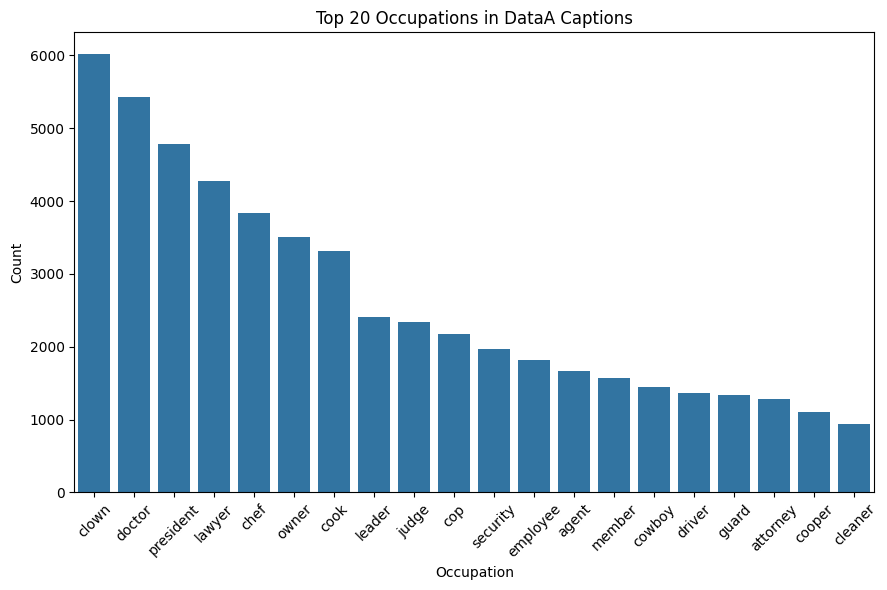

In [20]:
# count occurences of words and make a histogram
occupation_totals = Counter()
for i in range(len(dataA1)):
    df = dataA1[i]
    for counts in df['occupation_counts']:
        occupation_totals.update(counts)

# Show the most common occupations found
print(f"The most common occupations found in DataA captions are:\n")
print(occupation_totals.most_common(100))
print("\n\n")

#histogram of top 20 occupations
top_20 = occupation_totals.most_common(20)
occupations, counts = zip(*top_20)
plt.figure(figsize=(9, 6))
sns.barplot(x=list(occupations), y=list(counts))
plt.xticks(rotation=45)
plt.title("Top 20 Occupations in DataA Captions")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


As we see here, the most common jobs that occur are single word jobs. However, *clown* being the most frequent word seems interesting, as it is not always a job, but could be a way of describing someone. For this reason, we also run the same counting occupations on only the nouns present in our data. Remember, the nouns were extracted previously!

Processed occupation counts for nouns in dataA part 0.26%
Processed occupation counts for nouns in dataA part 0.52%
Processed occupation counts for nouns in dataA part 0.78%
Processed occupation counts for nouns in dataA part 1.04%
Processed occupation counts for nouns in dataA part 1.30%
Processed occupation counts for nouns in dataA part 1.56%
Processed occupation counts for nouns in dataA part 1.82%
Processed occupation counts for nouns in dataA part 2.08%
Processed occupation counts for nouns in dataA part 2.34%
Processed occupation counts for nouns in dataA part 2.60%
Processed occupation counts for nouns in dataA part 2.86%
Processed occupation counts for nouns in dataA part 3.12%
Processed occupation counts for nouns in dataA part 3.39%
Processed occupation counts for nouns in dataA part 3.65%
Processed occupation counts for nouns in dataA part 3.91%
Processed occupation counts for nouns in dataA part 4.17%
Processed occupation counts for nouns in dataA part 4.43%
Processed occu

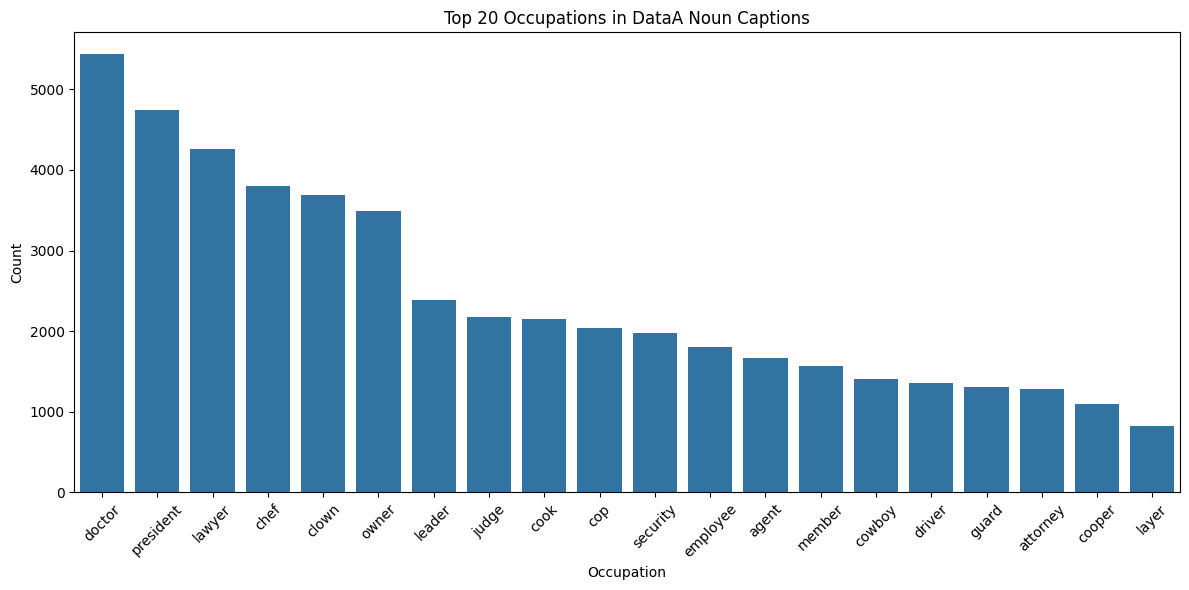

In [21]:
#go over the nouns columns and see which occupations are present
for i in range(len(dataA1)):
    df = dataA1[i]
    df['occupation_counts_nouns'] = df['captions_nouns'].apply(count_occupations)
    dataA1[i] = df
    print(f"Processed occupation counts for nouns in dataA part {(i+1)/len(dataA1)*100:.2f}%")

#count occurences of words and make a histogram for nouns occupation counts
occupation_totals_nouns = Counter()
for i in range(len(dataA1)):
    df = dataA1[i]
    for counts in df['occupation_counts_nouns']:
        occupation_totals_nouns.update(counts)
# Show the most common occupations found
print(occupation_totals_nouns.most_common(100))
#histogram of top 20 occupations for nouns
top_20_nouns = occupation_totals_nouns.most_common(20)
occupations_nouns, counts_nouns = zip(*top_20_nouns)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(occupations_nouns), y=list(counts_nouns))
plt.xticks(rotation=45)
plt.title("Top 20 Occupations in DataA Noun Captions")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Yay! we see that clown is not the funniest, though still quite high up there. To be continued...

---
### 'Temporal' Distribution of occupations

I will now check in which contests do occupations occur and how often they do in ratio with captions that have no comments.

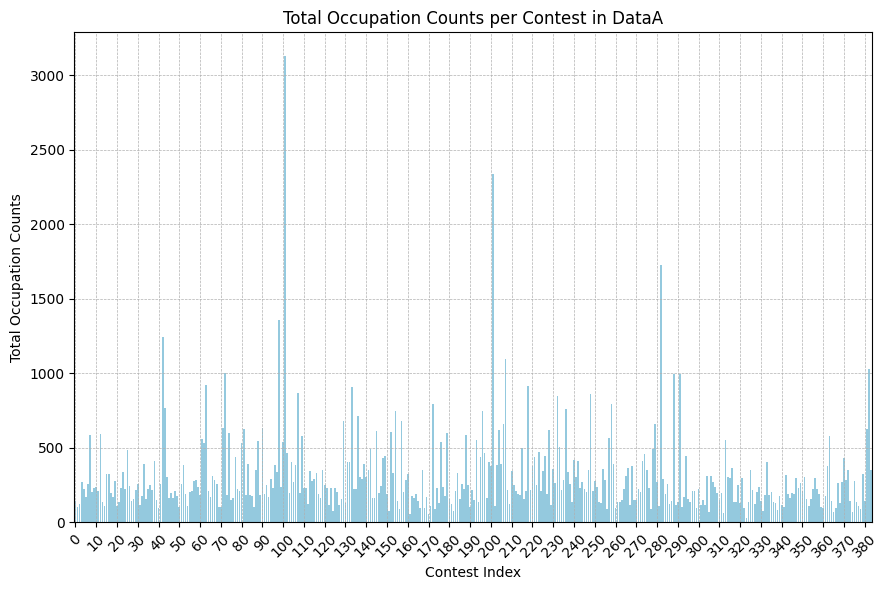

In [22]:
#In which contests do occupations appear most frequently?
occupation_counts_per_contest = []
for i in range(len(dataA1)):
    df = dataA1[i]
    total_occupations = sum(len(counts) for counts in df['occupation_counts'])
    occupation_counts_per_contest.append(total_occupations)

#plot
plt.figure(figsize=(9, 6))
sns.barplot(x=list(range(len(occupation_counts_per_contest))), y=occupation_counts_per_contest, color='skyblue')
plt.title("Total Occupation Counts per Contest in DataA")
plt.xlabel("Contest Index")
plt.ylabel("Total Occupation Counts")
plt.xticks(np.arange(0,len(occupation_counts_per_contest), step = 10), rotation=45)
plt.tight_layout()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()


We can also check if there are some captions with no occupations at all. Indeed, the code below shows there are no contests with no occupation mentioned. However, this may be due to the list used for occupations, or the way occupations are identified (maybe the list is still not perfect).

In [23]:
# Are there some contests with no occupations at all?
contests_with_no_occupations = [i for i, count in enumerate(occupation_counts_per_contest) if count == 0]

print(f"Contests with no occupations found: {contests_with_no_occupations}")

Contests with no occupations found: []


Lets check the temporal evolution of the number of job occurences in captions.

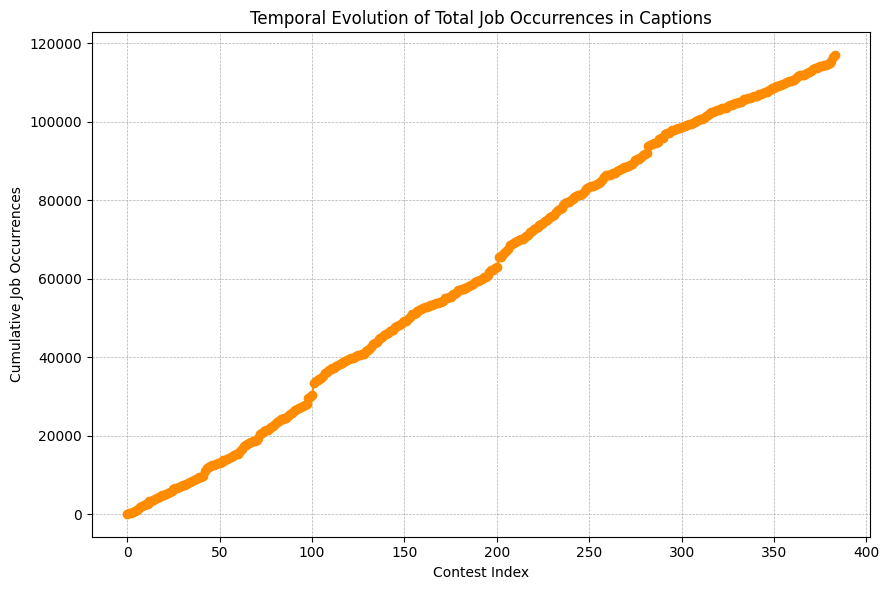

In [24]:
# Temporal evolution of total number of job occurences in captions
sum_occupations_over_time = []
sum_ = 0
for i in range(len(dataA1)):
    sum_ += occupation_counts_per_contest[i]
    sum_occupations_over_time.append(sum_)

plt.figure(figsize=(9, 6))
plt.plot(sum_occupations_over_time, marker='o', linestyle='-', color='darkorange')
plt.title("Temporal Evolution of Total Job Occurrences in Captions")
plt.xlabel("Contest Index")
plt.ylabel("Cumulative Job Occurrences")
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Let us look at the ratio of occupation mentions in captions to captions with no mention of occupations. 

C:\Users\andra\AppData\Local\Temp\ipykernel_20156\1246036046.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_with = np.sum(1 for counts in df['occupation_counts'] if len(counts) > 0)
C:\Users\andra\AppData\Local\Temp\ipykernel_20156\1246036046.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_without = np.sum(1 for counts in df['occupation_counts'] if len(counts) == 0)


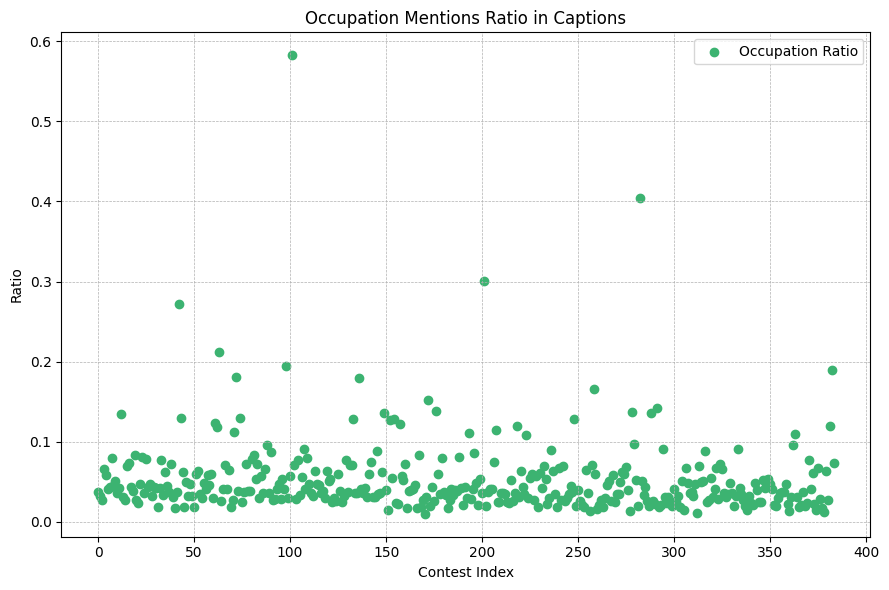

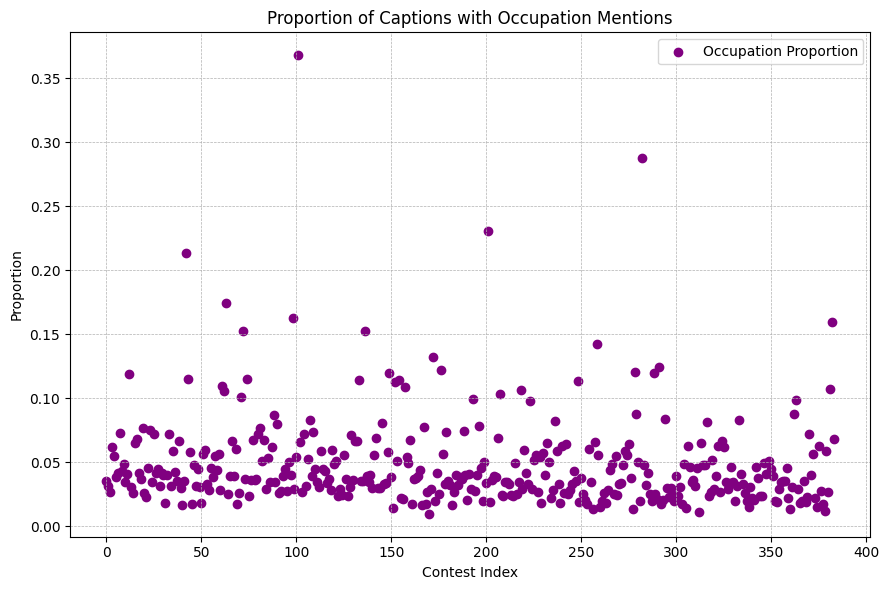

In [25]:
# ratio of captions with occupations to captions without occupations
caption_counts_with_occupations = []
caption_counts_without_occupations = []
for i in range(len(dataA1)):
    df = dataA1[i]
    count_with = np.sum(1 for counts in df['occupation_counts'] if len(counts) > 0)
    count_without = np.sum(1 for counts in df['occupation_counts'] if len(counts) == 0)
    caption_counts_with_occupations.append(count_with)
    caption_counts_without_occupations.append(count_without)

# Plot the ratios of captions with occupations to those without
ratios = [with_occ / (without_occ + 1e-6) for with_occ, without_occ in zip(caption_counts_with_occupations, caption_counts_without_occupations)]
plt.figure(figsize=(9, 6))
plt.scatter(np.arange(len(ratios)), ratios, marker='o', color='mediumseagreen', label='Occupation Ratio')
plt.title("Occupation Mentions Ratio in Captions")
plt.xlabel("Contest Index")
plt.ylabel("Ratio")
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend()
plt.show()

#proportion of captions with occupations to total captions
proportions = [with_occ / (with_occ + without_occ + 1e-6) for with_occ, without_occ in zip(caption_counts_with_occupations, caption_counts_without_occupations)]
plt.figure(figsize=(9, 6))
plt.scatter(np.arange(len(proportions)), proportions, marker='o', color='purple', label='Occupation Proportion')
plt.title("Proportion of Captions with Occupation Mentions")
plt.xlabel("Contest Index")
plt.ylabel("Proportion")
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend()
plt.show()


Finally, let us look at how jobs occur in the description of images and the uncanny descriptions too. These are all in `dataC`, and we can compare to the evolution found in the captions in `dataA`. I will count the number of unique jobs that occur in an image description. Note that synonyms are not dealt with right now, so "policeman" and "cop" count as different jobs.

In [26]:
#remove all NaN values
print(len(dataC1))
dataC1 = dataC1.dropna(subset='image_descriptions').reset_index(drop=True)
print(len(dataC1))

384
240


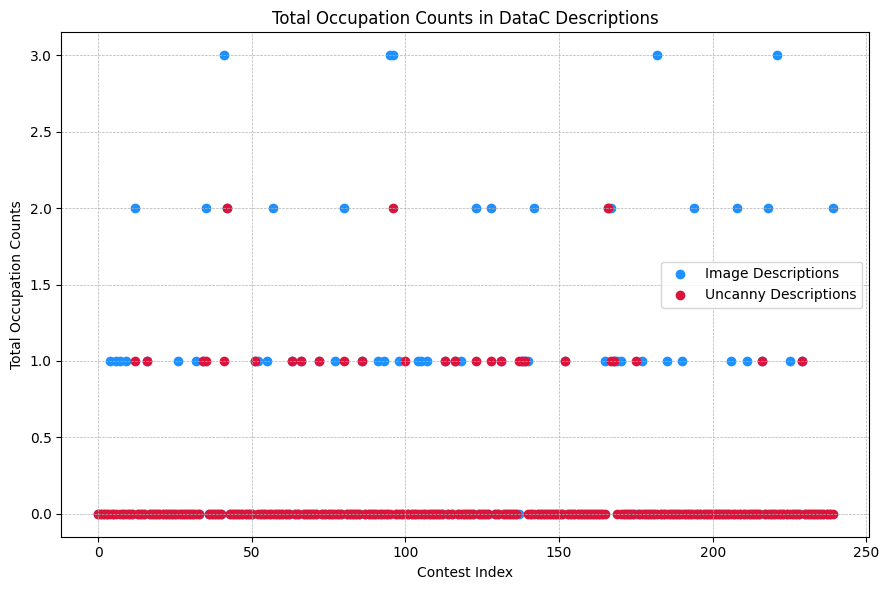

Maximum occupation count in image descriptions at contest index: 41 with count 3
Maximum occupation count in uncanny descriptions at contest index: 42 with count 2


The maximum image description row is: 
num_captions                                                                         5154.0
num_votes                                                                          928060.0
image_locations                                                       [a bar, a restaurant]
image_descriptions                        [A clown stares at a shop owner from outside t...
image_uncanny_descriptions                [It is weird for the clown to stare at someone...
entities                                  [https://en.wikipedia.org/wiki/Ownership, http...
questions                                 [Why is the clown staring at the clerk?, Why i...
date                                                                    2017-02-05 00:00:00
cleaned_image_locations                                    

In [27]:
# Count jobs in dataC descriptions and uncanny descriptions
dataC1['occupation_counts_image_descriptions'] = dataC1['cleaned_image_descriptions'].apply(count_occupations)
dataC1['occupation_counts_uncanny_descriptions'] = dataC1['cleaned_image_uncanny_descriptions'].apply(count_occupations)

nr_occupations_image_descriptions = [len(dataC1.loc[i, 'occupation_counts_image_descriptions']) for i in range(len(dataC1))]
nr_occupations_uncanny_descriptions = [len(dataC1.loc[i, 'occupation_counts_uncanny_descriptions']) for i in range(len(dataC1))]

plt.figure(figsize=(9, 6))
plt.scatter(np.arange(len(nr_occupations_image_descriptions)), nr_occupations_image_descriptions, marker='o', color='dodgerblue', label='Image Descriptions')
plt.scatter(np.arange(len(nr_occupations_uncanny_descriptions)), nr_occupations_uncanny_descriptions, marker='o', color='crimson', label='Uncanny Descriptions')
plt.title("Total Occupation Counts in DataC Descriptions")
plt.xlabel("Contest Index")
plt.ylabel("Total Occupation Counts")
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend()
plt.show()

#max at which contest
max_image_desc_index = np.argmax(nr_occupations_image_descriptions)
max_uncanny_desc_index = np.argmax(nr_occupations_uncanny_descriptions)
print(f"Maximum occupation count in image descriptions at contest index: {max_image_desc_index} with count {nr_occupations_image_descriptions[max_image_desc_index]}")
print(f"Maximum occupation count in uncanny descriptions at contest index: {max_uncanny_desc_index} with count {nr_occupations_uncanny_descriptions[max_uncanny_desc_index]}")

print("\n\nThe maximum image description row is: ")
print(dataC1.loc[max_image_desc_index])
print("\n\nThe maximum uncanny description row is: ")
print(dataC1.loc[max_uncanny_desc_index])


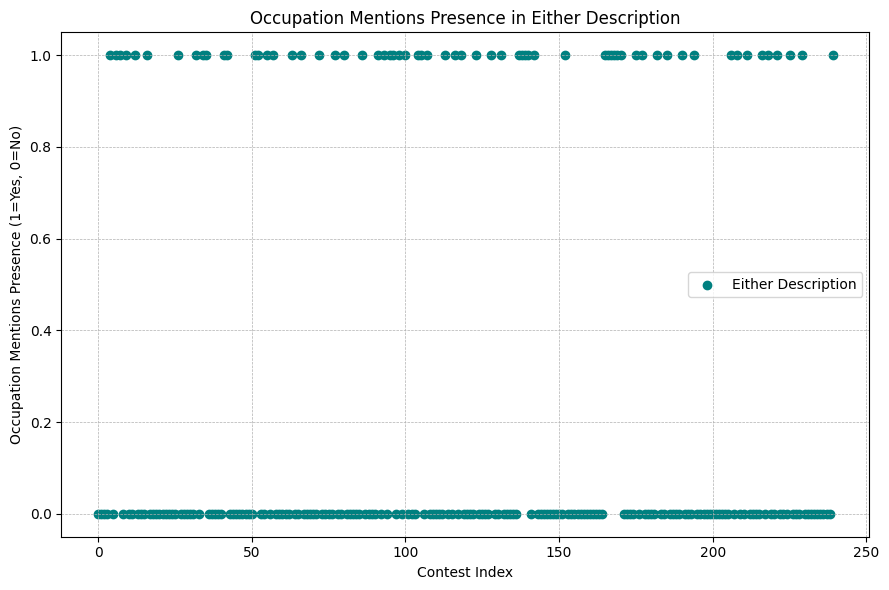

Number of contests with occupation mentions in either description: 64 out of 240


In [44]:
# Counting presence of occupations in either description
def has_occupation(d):
    return isinstance(d, dict) and len(d) > 0

occupation_presence_image_descriptions = dataC1['occupation_counts_image_descriptions'].apply(has_occupation).astype(int)
occupation_presence_uncanny_descriptions = dataC1['occupation_counts_uncanny_descriptions'].apply(has_occupation).astype(int)

# Either one has occupations
either = (occupation_presence_image_descriptions | occupation_presence_uncanny_descriptions).astype(int)

# both have occupations
both = (occupation_presence_image_descriptions & occupation_presence_uncanny_descriptions).astype(int)

# Plot
plt.figure(figsize=(9, 6))
plt.scatter(np.arange(len(either)), either, color='teal', label='Either Description')
plt.title("Occupation Mentions Presence in Either Description")
plt.xlabel("Contest Index")
plt.ylabel("Occupation Mentions Presence (1=Yes, 0=No)")
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend()
plt.show()

print(f"Number of contests with occupation mentions in either description: {either.sum()} out of {len(either)}")


So we see that we only have occupations occuring in the image (or at least its description) in $27\%$ of the captions, while we have jobs occuring in every caption contest. A future comparison would be to look at how the mentioned jobs in the metadata influence the number of occurences of jobs in captions, and if the jobs in the captions are the same as in the metadata or not. Remember to keep in mind, the metadata is much smaller than the caption dataset, so compare only relevant contests!

---
## Do jobs in the image imply more mentions?

Let us take the caption dataset and keep the images with available metadata. Now, count the number of occupations in the captions wich correspond to images where the description contains an occupation as well. Does the occupation in the image match the most frequent job mention?

Maybe do a test: does an occupation in the image make people joke about the occupation?

In [47]:
# reduce dataA to match dataC
dataA_reduced = dataA1[:len(dataC1)]

#make a new dataframe of length len(dataC1), which contains 1 if occupation mentioned in image or uncanny description, 0 otherwise
Occupation_in_Metadata = either.reset_index(drop=True)

# remember which type of description had the occupation
Occupation_in_Image_Descriptions = occupation_presence_image_descriptions.reset_index(drop=True)
Occupation_in_Uncanny_Descriptions = occupation_presence_uncanny_descriptions.reset_index(drop=True)

data_analysis_df = pd.DataFrame({
    'Occupation_in_Metadata': Occupation_in_Metadata,
    'Occupation_in_Image_Descriptions': Occupation_in_Image_Descriptions,
    'Occupation_in_Uncanny_Descriptions': Occupation_in_Uncanny_Descriptions
})

# add the total occupation count from dataA_reduced. One number per contest
occupation_counts_per_contest_reduced = occupation_counts_per_contest[:len(dataC1)]
data_analysis_df['count'] = occupation_counts_per_contest_reduced

# occupation in both
data_analysis_df['Occupation_in_Both_Descriptions'] = ((data_analysis_df['Occupation_in_Image_Descriptions'] == 1) & (data_analysis_df['Occupation_in_Uncanny_Descriptions'] == 1)).astype(int)
# when in image description
avg_when_image_0, avg_when_image_1 = data_analysis_df.groupby('Occupation_in_Image_Descriptions')['count'].mean()

# when in uncanny description
avg_when_uncanny_0, avg_when_uncanny_1 = data_analysis_df.groupby('Occupation_in_Uncanny_Descriptions')['count'].mean()

# when in any of the two
avg_when_0, avg_when_1 = data_analysis_df.groupby('Occupation_in_Metadata')['count'].mean()

# when in both descriptions
avg_when_both_0, avg_when_both_1 = data_analysis_df.groupby('Occupation_in_Both_Descriptions')['count'].mean()

print("Average count when Occupation_in_Image_Descriptions == 1:", avg_when_image_1)
print("Average count when Occupation_in_Image_Descriptions == 0:", avg_when_image_0)
print("Average count when Occupation_in_Uncanny_Descriptions == 1:", avg_when_uncanny_1)
print("Average count when Occupation_in_Uncanny_Descriptions == 0:", avg_when_uncanny_0)
print("Average count when Occupation_in_Metadata == 1:", avg_when_1)
print("Average count when Occupation_in_Metadata == 0:", avg_when_0)
print("Average count when Occupation_in_Both_Descriptions == 1:", avg_when_both_1)
print("Average count when Occupation_in_Both_Descriptions == 0:", avg_when_both_0)

# Fix KeyError: False — use the correct dataframe and boolean indexing
print(f"number of jobs in descriptions: {len(data_analysis_df[data_analysis_df['Occupation_in_Image_Descriptions'] == 1])}")
print(f"number of jobs in uncanny descriptions: {len(data_analysis_df[data_analysis_df['Occupation_in_Uncanny_Descriptions'] == 1])}")
print(f"number of captions in metadata: {len(data_analysis_df[data_analysis_df['Occupation_in_Metadata'] == 1])}")
print(f"number of captions in both descriptions: {len(data_analysis_df[data_analysis_df['Occupation_in_Both_Descriptions'] == 1])}")

Average count when Occupation_in_Image_Descriptions == 1: 349.62295081967216
Average count when Occupation_in_Image_Descriptions == 0: 325.8268156424581
Average count when Occupation_in_Uncanny_Descriptions == 1: 372.9655172413793
Average count when Occupation_in_Uncanny_Descriptions == 0: 326.22748815165875
Average count when Occupation_in_Metadata == 1: 348.34375
Average count when Occupation_in_Metadata == 0: 325.8863636363636
Average count when Occupation_in_Both_Descriptions == 1: 378.8076923076923
Average count when Occupation_in_Both_Descriptions == 0: 326.17289719626166
number of jobs in descriptions: 61
number of jobs in uncanny descriptions: 29
number of captions in metadata: 64
number of captions in both descriptions: 26


Is the mean number of occupations different when they occur in the image descriptions compared to when they don’t?

In [53]:
from scipy.stats import ttest_ind

group1 = data_analysis_df.loc[
    data_analysis_df['Occupation_in_Image_Descriptions'] == 1, 'count'
]

group0 = data_analysis_df.loc[
    data_analysis_df['Occupation_in_Image_Descriptions'] == 0, 'count'
]

# Welch's t-test (equal_var=False)
t_stat, p_val = ttest_ind(group1, group0, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_val)

print("Significant difference in counts based on occupation presence in image descriptions?" , p_val < 0.05)

# that jobs occur more often when they appear in images:
print("==============================")
t_stat, p_two = ttest_ind(group1, group0, equal_var=False)
p_one = p_two / 2 if t_stat > 0 else 1 - p_two/2
print("one-tailed p-value:", p_one)

#same for uncanny descriptions
group1_uncanny = data_analysis_df.loc[
    data_analysis_df['Occupation_in_Uncanny_Descriptions'] == 1, 'count'
]
group0_uncanny = data_analysis_df.loc[
    data_analysis_df['Occupation_in_Uncanny_Descriptions'] == 0, 'count'
]

# Welch's t-test (equal_var=False)
t_stat, p_val = ttest_ind(group1_uncanny, group0_uncanny, equal_var=False)

print("==============================")
print("t-statistic:", t_stat)
print("p-value:", p_val)
print("Significant difference in counts based on occupation presence in uncanny descriptions?" , p_val < 0.05)

print("==============================")
t_stat_uncanny, p_two_uncanny = ttest_ind(group1_uncanny, group0_uncanny, equal_var=False)
p_one_uncanny = p_two_uncanny / 2 if t_stat_uncanny > 0 else 1 - p_two_uncanny/2
print("one-tailed p-value (uncanny):", p_one_uncanny)

#both
group1_both = data_analysis_df.loc[
    data_analysis_df['Occupation_in_Both_Descriptions'] == 1, 'count'
]
group0_both = data_analysis_df.loc[
    data_analysis_df['Occupation_in_Both_Descriptions'] == 0, 'count'
]
# Welch's t-test (equal_var=False)
t_stat, p_val = ttest_ind(group1_both, group0_both, equal_var=False)
print("==============================")
print("t-statistic:", t_stat)
print("p-value:", p_val)
print("Significant difference in counts based on occupation presence in both descriptions?" , p_val < 0.05)
print("==============================")
t_stat_both, p_two_both = ttest_ind(group1_both, group0_both, equal_var=False)
p_one_both = p_two_both / 2 if t_stat_both > 0 else 1 - p_two_both/2
print("one-tailed p-value (both):", p_one_both)

#either
group1_either = data_analysis_df.loc[
    data_analysis_df['Occupation_in_Metadata'] == 1, 'count'
]
group0_either = data_analysis_df.loc[
    data_analysis_df['Occupation_in_Metadata'] == 0, 'count'
]
# Welch's t-test (equal_var=False)
t_stat, p_val = ttest_ind(group1_either, group0_either, equal_var=False)
print("==============================")
print("t-statistic:", t_stat)
print("p-value:", p_val)
print("Significant difference in counts based on occupation presence in either description?" , p_val < 0.05)
print("==============================")
t_stat_either, p_two_either = ttest_ind(group1_either, group0_either, equal_var=False)
p_one_either = p_two_either / 2 if t_stat_either > 0 else 1 - p_two_either/2
print("one-tailed p-value (either):", p_one_either)


t-statistic: 0.5551599945441464
p-value: 0.579824136555232
Significant difference in counts based on occupation presence in image descriptions? False
one-tailed p-value: 0.289912068277616
t-statistic: 0.8301729367609831
p-value: 0.4115670880187766
Significant difference in counts based on occupation presence in uncanny descriptions? False
one-tailed p-value (uncanny): 0.2057835440093883
t-statistic: 0.866595450400786
p-value: 0.39251155899502677
Significant difference in counts based on occupation presence in both descriptions? False
one-tailed p-value (both): 0.19625577949751338
t-statistic: 0.5353502768403796
p-value: 0.5933110161300037
Significant difference in counts based on occupation presence in either description? False
one-tailed p-value (either): 0.29665550806500185


All tests come back false. This means people joke about jobs regardless of its appearance in the cpation. 

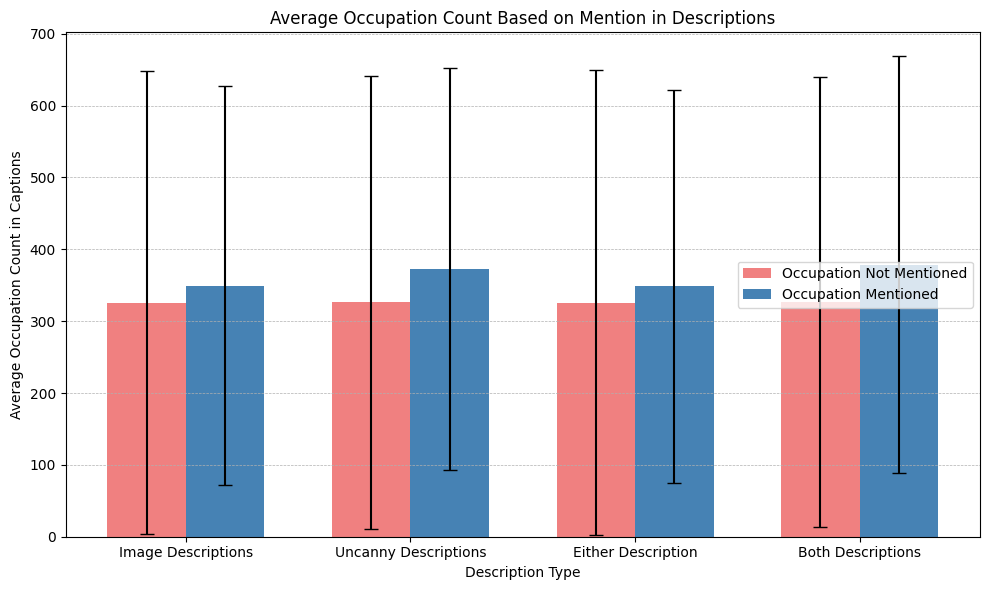

In [ ]:
#standard deviation calculation
std_when_image_0 = data_analysis_df.loc[
    data_analysis_df['Occupation_in_Image_Descriptions'] == 0, 'count'].std()
std_when_image_1 = data_analysis_df.loc[
    data_analysis_df['Occupation_in_Image_Descriptions'] == 1, 'count'].std()
std_when_uncanny_0 = data_analysis_df.loc[
    data_analysis_df['Occupation_in_Uncanny_Descriptions'] == 0, 'count'].std()
std_when_uncanny_1 = data_analysis_df.loc[
    data_analysis_df['Occupation_in_Uncanny_Descriptions'] == 1, 'count'].std()
std_when_0 = data_analysis_df.loc[
    data_analysis_df['Occupation_in_Metadata'] == 0, 'count'].std()
std_when_1 = data_analysis_df.loc[
    data_analysis_df['Occupation_in_Metadata'] == 1, 'count'].std()
std_when_both_0 = data_analysis_df.loc[
    data_analysis_df['Occupation_in_Both_Descriptions'] == 0, 'count'].std()
std_when_both_1 = data_analysis_df.loc[
    data_analysis_df['Occupation_in_Both_Descriptions'] == 1, 'count'].std()


#bar chart of the averages
labels = ['Image Descriptions', 'Uncanny Descriptions', 'Either Description', 'Both Descriptions']
averages = [avg_when_image_1, avg_when_uncanny_1, avg_when_1, avg_when_both_1]
averages_0 = [avg_when_image_0, avg_when_uncanny_0, avg_when_0, avg_when_both_0]
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, averages_0, width, label='Occupation Not Mentioned', color='lightcoral')
bars2 = ax.bar(x + width/2, averages, width, label='Occupation Mentioned', color='steelblue')

# Add error bars
ax.errorbar(x - width/2, averages_0, yerr=[std_when_image_0, std_when_uncanny_0, std_when_0, std_when_both_0], fmt='none', ecolor='black', capsize=5)
ax.errorbar(x + width/2, averages, yerr=[std_when_image_1, std_when_uncanny_1, std_when_1, std_when_both_1], fmt='none', ecolor='black', capsize=5)
ax.set_xlabel('Description Type')
ax.set_ylabel('Average Occupation Count in Captions')
ax.set_title('Average Occupation Count Based on Mention in Descriptions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
ax.legend()



So, we seethe tests fail due to the large variance. This might indicate i do not capture all jobs properly, or that i include stuff that i really shouldnt

---
## Which comments do jobs occur in?

Let us check now the performance of comments with jobs in them.

In [64]:
dataA2 = dataA1.copy()

df_test = dataA2[15]

# mae a column with total occupation counts per caption
df_test['total_occupation_counts'] = df_test['occupation_counts'].apply(lambda x: sum(x.values()) if isinstance(x, dict) else 0)

group_with = df_test[df_test['total_occupation_counts'] > 0]['mean']
group_without = df_test[df_test['total_occupation_counts'] == 0]['mean']

t_stat, p_two = ttest_ind(group_with, group_without, equal_var=False)

# one-tailed: test whether group_with > group_without
if t_stat > 0:
    p_one = p_two / 2
else:
    p_one = 1 - p_two / 2

print("t-statistic:", t_stat)
print("one-tailed p-value:", p_one)
print("Significant difference in means based on occupation presence in captions?" , p_one < 0.05)


t-statistic: 5.678855551481262
one-tailed p-value: 1.406970153946343e-08
Significant difference in means based on occupation presence in captions? True


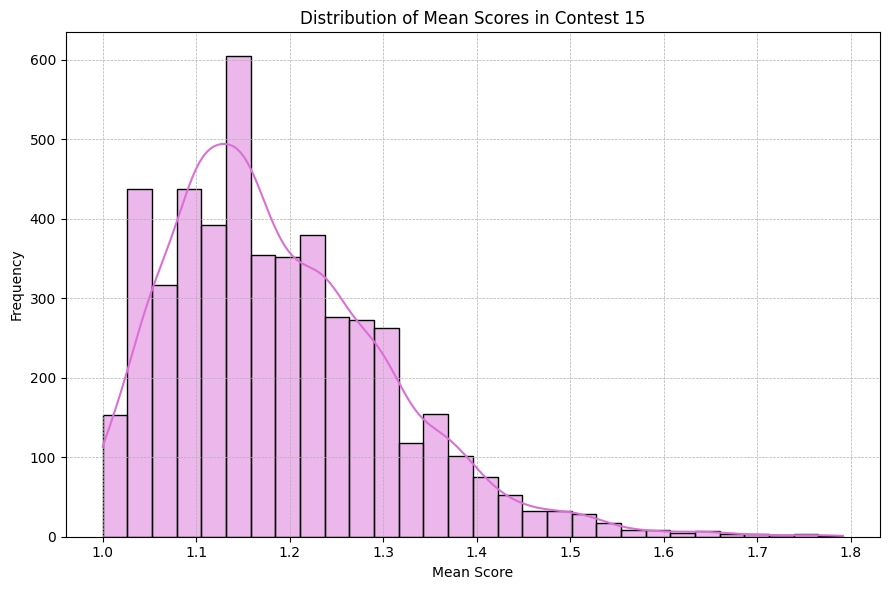

In [67]:
#what is the distribution of the mean?
plt.figure(figsize=(9, 6))
sns.histplot(df_test['mean'], bins=30, kde=True, color='orchid')
plt.title("Distribution of Mean Scores in Contest 15")
plt.xlabel("Mean Score")
plt.ylabel("Frequency")
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [66]:
from scipy.stats import mannwhitneyu
u, p = mannwhitneyu(group_with, group_without, alternative='greater')
print("Mann-Whitney U statistic:", u)
print("one-tailed p-value (Mann-Whitney):", p)


Mann-Whitney U statistic: 875023.5
one-tailed p-value (Mann-Whitney): 8.366155708554564e-10


Yayyy! captions with occupations score better!

In [ ]:
results = []

for idx, df_test in enumerate(dataA2):
    # make a copy so we don’t modify original
    df = df_test.copy()

    # compute occupation count per caption
    df['total_occupation_counts'] = df['occupation_counts'].apply(
        lambda x: sum(x.values()) if isinstance(x, dict) else 0
    )

    group_with = df[df['total_occupation_counts'] > 0]['mean']
    group_without = df[df['total_occupation_counts'] == 0]['mean']

    # skip if either group is empty
    if len(group_with) == 0 or len(group_without) == 0:
        results.append({
            'index': idx,
            't_stat': None,
            'p_one': None,
            'significant': None,
            'note': 'One of the groups is empty'
        })
        continue

    # Welch's t-test
    t_stat, p_two = ttest_ind(group_with, group_without, equal_var=False)

    # One-tailed p-value (testing group_with > group_without)
    if t_stat > 0:
        p_one = p_two / 2
    else:
        p_one = 1 - p_two / 2

    results.append({
        'index': idx,
        't_stat': t_stat,
        'p_one': p_one,
        'significant': p_one < 0.05,
        'n_with_occ': len(group_with),
        'n_without_occ': len(group_without)
    })

# convert to a summary dataframe
results_df = pd.DataFrame(results)

print(results_df)

#when is it significant?
significant_results = results_df[results_df['significant'] == True]
print("Contests with significant differences in means based on occupation presence in captions:")
print(len(significant_results))

c:\Users\andra\anaconda3\envs\myenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


     index    t_stat         p_one  significant  n_with_occ  n_without_occ
0        0 -0.156445  5.620516e-01        False         140           3765
1        1  1.583349  5.812742e-02        False         104           3221
2        2 -1.163702  8.766279e-01        False         119           4280
3        3 -0.690500  7.547862e-01        False         257           3884
4        4 -4.681103  9.999977e-01        False         217           3734
..     ...       ...           ...          ...         ...            ...
379    379 -3.931131  9.999489e-01        False         306           4853
380    380 -1.014623  8.440060e-01        False         138           5050
381    381  6.194343  5.067711e-10         True         591           4922
382    382  0.099346  4.604390e-01        False         982           5175
383    383 -2.956187  9.983484e-01        False         339           4619

[384 rows x 6 columns]
Contests with significant differences in means based on occupation presence 

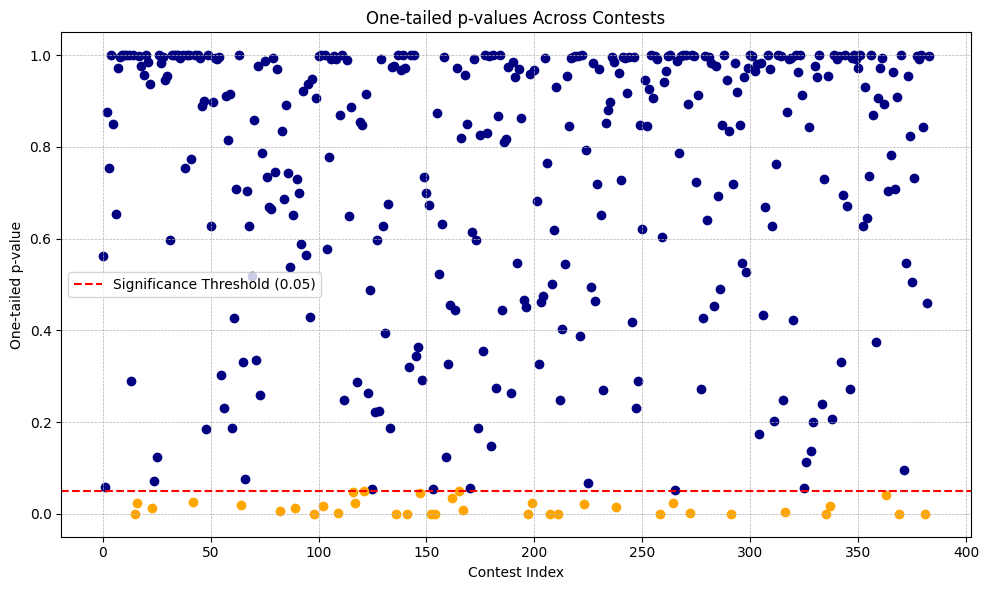

In [74]:
#plot the p-values over contests
plt.figure(figsize=(10, 6))
plt.scatter(results_df[results_df['p_one']> 0.05]['index'], results_df[results_df['p_one']> 0.05]['p_one'], marker='o', color='navy')
plt.scatter(results_df[results_df['p_one']<= 0.05]['index'], results_df[results_df['p_one']<= 0.05]['p_one'], marker='o', color='orange')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Threshold (0.05)')
plt.title("One-tailed p-values Across Contests")
plt.xlabel("Contest Index")
plt.ylabel("One-tailed p-value")
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend()
plt.show()


---
After the lecture it seems like I need to make some revisions.
- Lemmatisation is removed: the occupation list accepts small variations within the jobs, so it is better not to lemmatise as it might remove some jobs,
- I will not correct for typos as it might incorreclty correct jobs.
- I will not remove stopwords as some jobs have stopwords in them: "chief of Staff" the data will thus be very noisy, but I think stopwords can be handled later. I will remove on the other hand anything that is only 1 letter long. Those are evidently not jobs.

In [7]:
import string
def preprocess_text_list(entry, min_len=1):
    """Preprocess a list of text entries or a single string."""
    if isinstance(entry, list):
        text = " ".join(entry)
    elif isinstance(entry, str):
        text = entry
    else:
        return ""

    # Lowercase
    text = text.lower()

    # Expand contractions
    text = contractions.fix(text)

    # Typo correction
    #text = str(TextBlob(text).correct())

    # Remove punctuation
    
    text = text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))


    # Tokenize
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if len(word) >= min_len]

    # Remove stopwords and short tokens
    #tokens = [word for word in tokens if word not in stop_words and len(word) >= min_len]

    # Lemmatize
    #tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

#load official data
official_datafile = '../../data/data_prepared.pkl'
if os.path.exists(official_datafile):
    with open(official_datafile, "rb") as f:
        official_stored_data = pickle.load(f)
    print("Official data loaded successfully.")
else:
    print("File not found.")

dataA_official = official_stored_data["dataA"]
dataC_official = official_stored_data["dataC"]
dataA2 = dataA_official.copy()
dataC2 = dataC_official.copy()

#preprocess captions again with new function
for i in range(len(dataA2)):
    df = dataA2[i]
    df['cleaned_caption_v2'] = df['caption'].apply(preprocess_text_list)
    dataA2[i] = df
    print(f"Reprocessed captions for dataA part {(i+1)/len(dataA2)*100:.2f}%")

#apply to dataC as well
dataC2['cleaned_image_descriptions_v2'] = dataC2['image_descriptions'].apply(preprocess_text_list)
dataC2['cleaned_image_uncanny_descriptions_v2'] = dataC2['image_uncanny_descriptions'].apply(preprocess_text_list)
dataC2['cleaned_question_descriptions_v2'] = dataC2['questions'].apply(preprocess_text_list)
#save the new dataA2 with cleaned_caption_v2
official_stored_data_updated = {
    "dataA": dataA2,
    "dataC": dataC2,
    "dataA_startID": official_stored_data["dataA_startID"],
    "dataA_endID": official_stored_data["dataA_endID"],
    "dataC_lastGoodID": official_stored_data["dataC_lastGoodID"]
}
with open('../../data/data_prepared_v2.pkl', "wb") as f:
    pickle.dump(official_stored_data_updated, f)
print("Updated official data with reprocessed captions saved successfully.")

Official data loaded successfully.
Reprocessed captions for dataA part 0.26%
Reprocessed captions for dataA part 0.52%
Reprocessed captions for dataA part 0.78%
Reprocessed captions for dataA part 1.04%
Reprocessed captions for dataA part 1.30%
Reprocessed captions for dataA part 1.56%
Reprocessed captions for dataA part 1.82%
Reprocessed captions for dataA part 2.08%
Reprocessed captions for dataA part 2.34%
Reprocessed captions for dataA part 2.60%
Reprocessed captions for dataA part 2.86%
Reprocessed captions for dataA part 3.12%
Reprocessed captions for dataA part 3.39%
Reprocessed captions for dataA part 3.65%
Reprocessed captions for dataA part 3.91%
Reprocessed captions for dataA part 4.17%
Reprocessed captions for dataA part 4.43%
Reprocessed captions for dataA part 4.69%
Reprocessed captions for dataA part 4.95%
Reprocessed captions for dataA part 5.21%
Reprocessed captions for dataA part 5.47%
Reprocessed captions for dataA part 5.73%
Reprocessed captions for dataA part 5.99%

In [8]:
#load the new pickle file to verify
with open('../../data/data_prepared_v2.pkl', "rb") as f:
    official_stored_data_loaded = pickle.load(f)
print("Reprocessed official data loaded successfully.")
dataA2 = official_stored_data_loaded["dataA"]
dataC2 = official_stored_data_loaded["dataC"]


Reprocessed official data loaded successfully.


In [ ]:
#corpus = all captions
# document = a single caption
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Funniness metric is "mean" for now.
funniness_metric= "funny_score_scaled"
documents = []
all_funniness = []
for i in range(len(dataA2)):
    df = dataA2[i]
    documents.extend(df['cleaned_caption_v2'].tolist())
    all_funniness.extend(df[funniness_metric].tolist())

print(f"Total captions collected: {len(documents)}")
print(f"The first few captions are: {documents[:5]}")
print(f"The datatype of documents is: {type(documents)}")
print(f"The datatype of all_funniness is: {type(all_funniness)}")

Total captions collected: 2292678
The first few captions are: ['i am a congressman obstruction is my job', 'i am what they mean when they say the middle class is getting stepped on', 'does this suit make me look flat', 'when the right woman comes along i will know it', 'i used to lie in the gutter but then i quit drinking']
The datatype of documents is: <class 'list'>
The datatype of all_funniness is: <class 'list'>


In [19]:
import time
#vectorising
nGram_range = (1, 2)  # unigrams and bigrams, make (1,3) for trigrams as well
begin_time = time.time()
vectorizer = TfidfVectorizer(ngram_range=nGram_range)
tfidf_matrix = vectorizer.fit_transform(documents)
end_time = time.time()
print(f"TF-IDF vectorization completed in {end_time - begin_time:.2f} seconds.")
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

TF-IDF vectorization completed in 64.77 seconds.
TF-IDF matrix shape: (2292678, 2889983)


In [30]:
import ast
occupation_list = pd.read_csv("final_combined_occupations.csv")['Synonyms'].tolist()
# Flatten the list of synonyms
flat_occupation_list = [syn.lower() for sublist in occupation_list for syn in ast.literal_eval(sublist)]
print(f"Total occupation synonyms: {len(flat_occupation_list)}")

occupation_list = flat_occupation_list

Total occupation synonyms: 62677


In [ ]:
# Map feature names to indices
feature_names = np.array(vectorizer.get_feature_names_out())
occupation_terms_lower = [occ.lower() for occ in occupation_list]
occupation_indices = np.where(np.isin(feature_names, occupation_terms_lower))[0]

# Sum TF-IDF across documents for each occupation term
occupation_counts = tfidf_matrix[:, occupation_indices].sum(axis=0)  # still sparse
occupation_counts = np.array(occupation_counts).flatten()  # small, safe array

In [58]:
import joblib
#remove 'do' from occupation indices and counts
if 'do' in feature_names[occupation_indices]:
    do_index = np.where(feature_names[occupation_indices] == 'do')[0][0]
    occupation_indices = np.delete(occupation_indices, do_index)
    occupation_counts = np.delete(occupation_counts, do_index)
if 'pick up' in feature_names[occupation_indices]:
    pu_index = np.where(feature_names[occupation_indices] == 'pick up')[0][0]
    occupation_indices = np.delete(occupation_indices, pu_index)
    occupation_counts = np.delete(occupation_counts, pu_index)

if 'laundry' in feature_names[occupation_indices]:
    la_index = np.where(feature_names[occupation_indices] == 'laundry')[0][0]
    occupation_indices = np.delete(occupation_indices, la_index)
    occupation_counts = np.delete(occupation_counts, la_index)

if 'sales' in feature_names[occupation_indices]:
    sa_index = np.where(feature_names[occupation_indices] == 'sales')[0][0]
    occupation_indices = np.delete(occupation_indices, sa_index)
    occupation_counts = np.delete(occupation_counts, sa_index)
joblib.dump(vectorizer, "vectorizer.joblib")
from scipy.sparse import save_npz

save_npz("tfidf_matrix.npz", tfidf_matrix)
np.save("occupation_indices.npy", occupation_indices)
np.save("occupation_counts.npy", occupation_counts)


In [59]:
import joblib

vectorizer = joblib.load("vectorizer.joblib")
from scipy.sparse import load_npz

tfidf_matrix = load_npz("tfidf_matrix.npz")
occupation_indices = np.load("occupation_indices.npy")
occupation_counts = np.load("occupation_counts.npy")


This contains the idf matrix entries which mention occupations from our occupations list.

In [60]:
# Boolean mask: does document contain any occupation term?
mask_docs_with_occupation = tfidf_matrix[:, occupation_indices].sum(axis=1) > 0  # still sparse
mask_docs_with_occupation = np.array(mask_docs_with_occupation).flatten()  # small array

#how many documents contain occupation terms?
num_docs_with_occupation = np.sum(mask_docs_with_occupation)
print(f"Number of documents containing at least one occupation term: {num_docs_with_occupation} out of {len(documents)}")
print(f"Proportion: {num_docs_with_occupation / len(documents):.4f}")

Number of documents containing at least one occupation term: 142765 out of 2292678
Proportion: 0.0623


In [61]:
funniness_with_occ = np.array(all_funniness)[mask_docs_with_occupation]
funniness_without_occ = np.array(all_funniness)[~mask_docs_with_occupation]
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(funniness_with_occ, funniness_without_occ, equal_var=False)
print(f"T-test: t={t_stat:.2f}, p={p_val:.4f}")

alpha = 0.05
print(f"H0: There is no difference in the mean funniness scores between captions that contain occupation terms and captions that do not.")
print(f"H1: There is a difference in the mean funniness scores between the two groups.")
if p_val < alpha:
    print(
        "We can safely reject the null hypothesis.\n"
        "There appears to be a significant difference\n"
        "in the mean funniness of captions with occupations\n"
        "and captions without occupations."
    )
else:
    print(
        "We fail to reject the null hypothesis.\n"
        "There does not appear to be a significant difference\n"
        "in the mean funniness between captions with occupations\n"
        "and captions without occupations."
    )


T-test: t=-11.41, p=0.0000
H0: There is no difference in the mean funniness scores between captions that contain occupation terms and captions that do not.
H1: There is a difference in the mean funniness scores between the two groups.
We can safely reject the null hypothesis.
There appears to be a significant difference
in the mean funniness of captions with occupations
and captions without occupations.


Here we compare the average value of the funniness score when there is an occupation present, as opposed to when there isn't.

In [62]:
# Sum TF-IDF values for occupation terms per document
tfidf_per_doc_for_occ = tfidf_matrix[:, occupation_indices].sum(axis=1)
tfidf_per_doc_for_occ = np.array(tfidf_per_doc_for_occ).flatten()

# Average funniness by occupation (loop over small set of indices)
avg_funniness_per_occ = []
for idx in occupation_indices:
    mask = tfidf_matrix[:, idx].toarray().flatten() > 0  # safe, small array per term
    avg_funniness = np.array(all_funniness)[mask].mean()
    avg_funniness_per_occ.append(avg_funniness)


In [63]:
#save occupation counts to a file

occupation_analysis_df = pd.DataFrame({
    'Occupation_Term': feature_names[occupation_indices],
    'TFIDF_Sum': occupation_counts,
    'Avg_Funniness': avg_funniness_per_occ
})
occupation_analysis_df.to_csv("occupation_analysis.csv", index=False)

In [64]:
#read occupation analysis
occupation_analysis_df = pd.read_csv("occupation_analysis.csv")

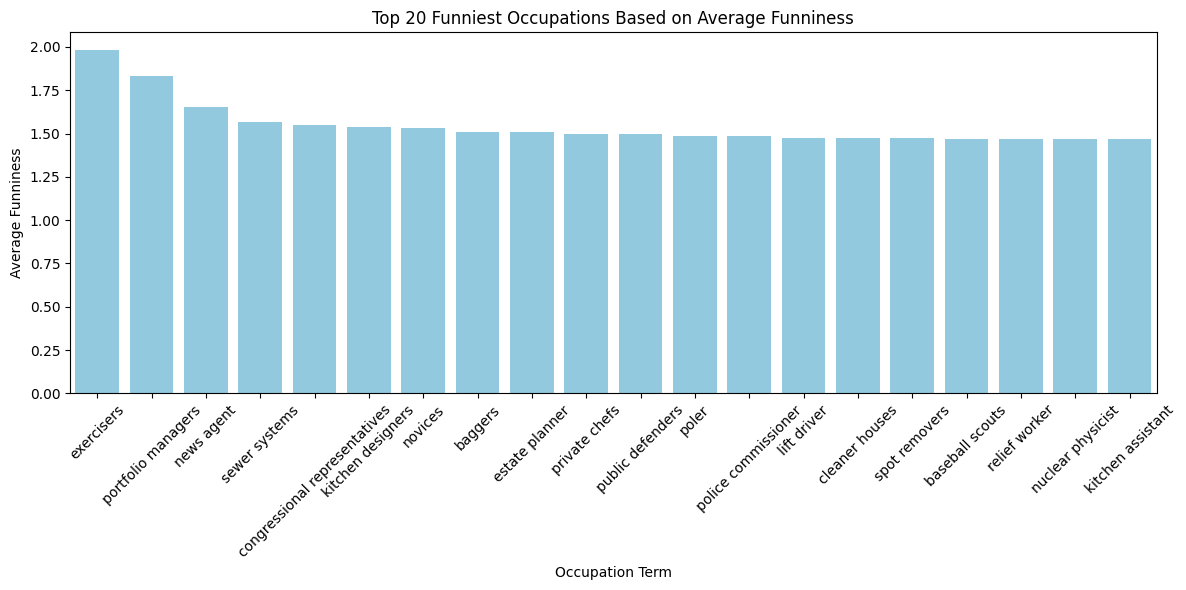

In [65]:
top_20_funny_occupations = occupation_analysis_df.sort_values(
    by='Avg_Funniness', ascending=False
).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='Occupation_Term',y='Avg_Funniness',data=top_20_funny_occupations,color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Funniest Occupations Based on Average Funniness")
plt.xlabel("Occupation Term")
plt.ylabel("Average Funniness")
plt.tight_layout()
plt.show()


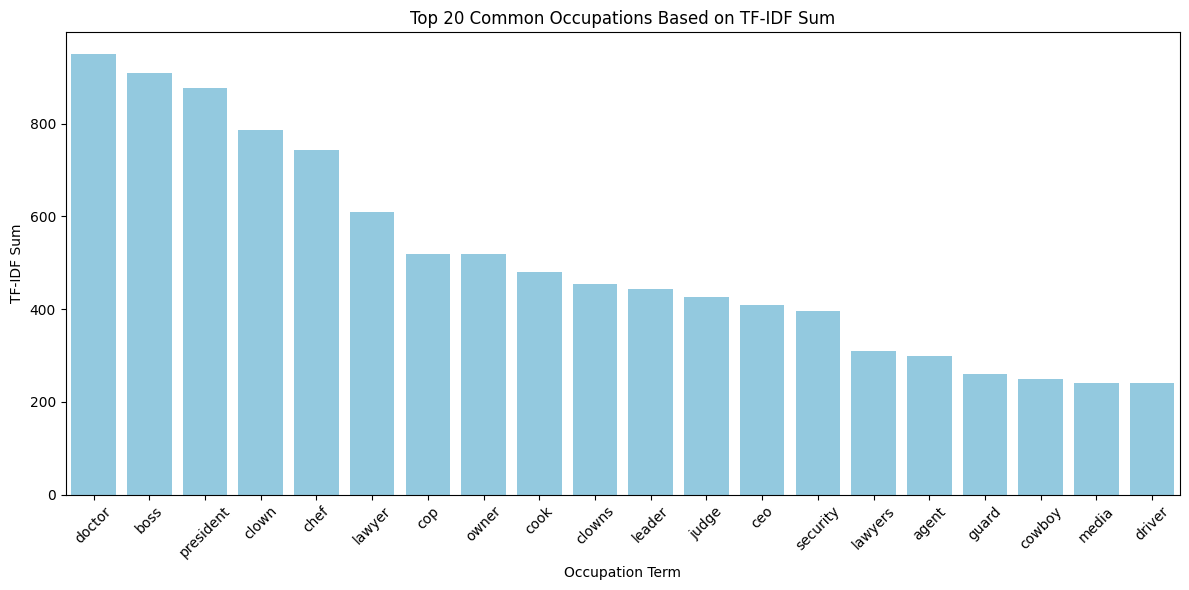

In [66]:
#plot most common occupations based on TFIDF_Sum
top_20_common_occupations = occupation_analysis_df.sort_values(by='TFIDF_Sum', ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x='Occupation_Term',y='TFIDF_Sum',data=top_20_common_occupations,color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Common Occupations Based on TF-IDF Sum")
plt.xlabel("Occupation Term")
plt.ylabel("TF-IDF Sum")
plt.tight_layout()
plt.show()

---
# 28.11.2025